## Default on Credit Card Payment


The purpose of this project is to develop a predictive model that can be used to help the organizations use their data to make better decisions. This is achieved by applying classification techniques to organizations’ data source to make the predictions. A predictive analytics application allows the organization to identify the risks and address them in real time to reach better outcomes. For example, when a customer asks to apply for a new credit card or increase their monthly credit balance, it is necessary for the bank to analyze available data related to that customer before making the decision.


### Data


The Dataset used is **Default of Credit Card Clients**.The dataset contains information on default payments, demographic factors, credit data, history of payments, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.



The original dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients) at the UCI Machine Learning Repository.

In [1]:
#load necessary liabraries
# regex
import re

#data explore
import numpy as np
np.random.seed(1333)

#support for reading excel files
import xlrd
# dataframes in python
import pandas as pd
import seaborn as sns
import sklearn.cross_validation
import matplotlib.pyplot as plt
#from twisted.python.compat import xrange
import gc

from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_excel('./data/default of credit card clients.xls', sheetname='Data',skiprows=1)
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


My goal is to predict the ** target Y ** ( default or not ) with the ** features X **. In this classification problem Y is a binary variable denoting **'not default as 0' ** and **'default as 1'**.

Here, I am going to  apply the random forest classifier to the data and use cross-validation to explore how the score of the classifier changes when varying the number of trees in the forest.

Lets look into default and not default acounts in our dataset.

In [3]:
df = df.drop('ID', axis=1)
fig = plt.figure()
fig.set_size_inches(4,4)
#groupby target column to get default and not default count
d = df.groupby(['default payment next month']).size()
print(" Payments : Default= 1 ")
print(d)
print("defaulting accounts are {}% out of {} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))

plt.show()

 Payments : Default= 1 
default payment next month
0    23364
1     6636
dtype: int64
defaulting accounts are 22.12% out of 30000 observations


The defaulting accounts are 22.2% out of 30000 samples which means **Unbalanced majority and minority classes**.

I will use the **default payment next month **column as my **target **variable. I am going to save the default payment next month column as a separate numpy array (labeled Y) and remove(drop) the default payment next month column from the dataframe.Save the feature information into matrix as **X**.

In [4]:
y = df['default payment next month'].values
#print(y)
df = df.drop('default payment next month',axis=1)
X = df.as_matrix()
print(X.shape)
print(y.shape)


(30000, 23)
(30000,)


### RandomForestClassifier

For RandomForestClassifier we need to specify n_estimators.n_estimators is the parameter specifying the number of trees in RandomForestClassifier. Then I create a list of all the classifier scores for the 40 trees .

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.decomposition import PCA

scores = []

for val in range(1,41):
    clf = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf ,X ,y ,cv = 10)
    scores.append(validated)    

I create a list of all the classifier scores for 40 trees.Calculate majority class percentage and draw line horizontally in the graph.

### Evaluating The Unbalanced Classes


77.88000000000001


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


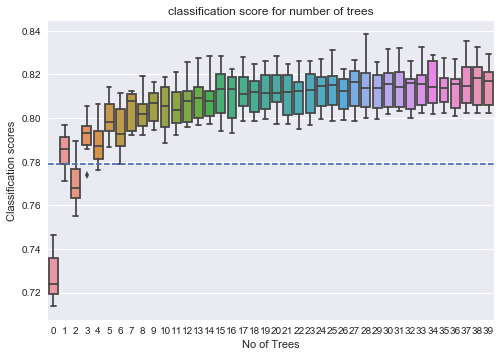

In [6]:
df_score = pd.DataFrame(scores, columns=['1', '2', '3','4','5','6','7','8','9','10'])
# Transpose
df_score_T = df_score.T

#row max
df_score_rowmax = df_score_T.max(axis=0)

len_y = len(y)
temp = [i for i in y if i == 0]
temp_1 = temp.count(0)

percentage = float(temp_1)/float(len_y)

print(float(temp_1)/float(len_y) *100)

sns.boxplot(df_score_T)
plt.axhline(y = percentage, ls = '--')
#sns.boxplot(df_score_T)
plt.xlabel('No of Trees')
plt.ylabel('Classification scores')
plt.title('classification score for number of trees')
plt.show()



We can notice that accuracy seems to improve with additional trees. We should also consider the computational cost of fitting additional trees compared to the small accuracy benefit.Even though the trees are increasing we don't see much improvement in accuracy.We are taking n_estimator as 25.

Due to imbalance in our dataset we have to use different metrics that are less sensitive to imbalance when evaluating the predictive performance of classifiers.The goal is to identify the members of the positive class /the rare class/minority successfully. For which we have to use high precision and high recall.Because precision and recall both provide valuable information about the quality of a classifier, you often want to combine them into a single general-purpose score ** F1 score**.

The F1 score thus tends to favor classifiers that are strong in both precision and recall, rather than classifiers that emphasize one at the cost of the other.

In [7]:
collected = gc.collect()
print("Garbage collector: collected %d objects." % (collected))

scores = []

for val in range(1,41):
    clf = RandomForestClassifier(n_estimators = val)
    validated = cross_val_score(clf ,X ,y ,cv = 10,scoring = 'f1')
    scores.append(validated)    

Garbage collector: collected 42935 objects.


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


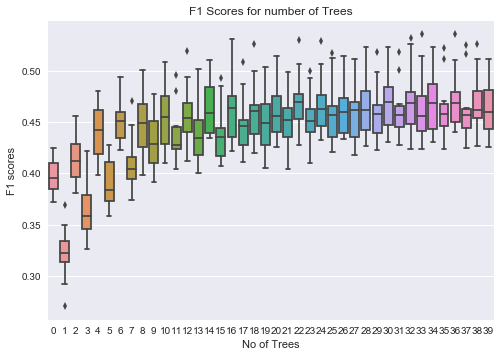

In [8]:
df_score = pd.DataFrame(scores, columns=['1', '2', '3','4','5','6','7','8','9','10'])
# Transpose
df_score_T = df_score.T

sns.boxplot(df_score_T)
plt.xlabel('No of Trees')
plt.ylabel('F1 scores')
plt.title('F1 Scores for number of Trees')
plt.show()


You can see that the scores are clustered around the 45% mark. There is only very little gain now by increasing the number of trees.

### Setting the cutoff value for prediction

Many classifiers( including random forests) can return prediction probabilities, for example: given a point X there is 70% probability that it belongs to class 1 and 30% probability that it belongs to class 0. However, when the classes in the training data are unbalanced, these predictions calculated by the classifier can be inaccurate because many classifiers do not know how to adjust for this imbalance. This problem is solved using **calibration**.


If a classifier’s prediction probabilities are accurate, the appropriate way to convert its probabilities into predictions is to simply choose the class with probability > 0.5. This is the default behavior of classifiers when you call their predict method. When the probabilities are inaccurate, this does not work well, but you can still get good predictions by choosing a more appropriate cutoff.


Fit a random forest classifier using 25 trees and predict the probabilities.Put a constraint that class1 of predicted probabilities > 0.5, label with 1 and 0. 

Using 10-fold cross validation, we are going to find a cutoff in np.arange(0.1,0.9,0.1) that gives the best average F1 score when converting prediction probabilities from a 25-tree random forest classifier into predictions.


In [9]:
'''
clf = RandomForestClassifier(n_estimators = 25)
clf.fit(X,y)
(clf.predict_prob(X)[:,1]>0.5).astype(int)
'''

def cutoff_predict(clf,X,cutoff):
    return (clf.predict_proba(X)[:,1] > 0.5).astype(int)
scores1 = []

def custom_f1(cutoff):
    def f1_cutoff(clf,X,y):
        ypred = cutoff_predict(clf, X, cutoff)
      
        return sklearn.metrics.f1_score(y, ypred)

    return f1_cutoff
for cutoff in np.arange(0.1,0.9,0.1):
    clf = RandomForestClassifier(n_estimators = 25)
    validated = cross_val_score(clf ,X ,y ,cv = 10 , scoring = custom_f1(cutoff))
    scores1.append(validated)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


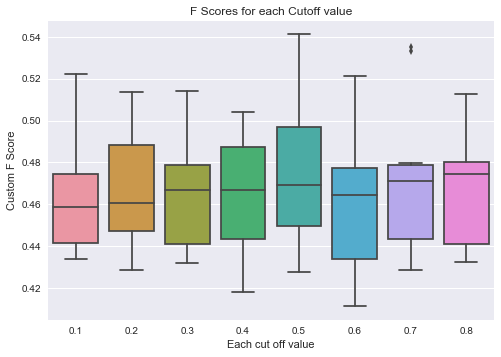

In [10]:

#print(scores1)
df_score = pd.DataFrame(scores1, columns=['1', '2', '3','4','5','6','7','8','9','10'])

# Transpose
df_score_T = df_score.T
df_score_T.columns = np.arange(0.1,0.9,0.1)


sns.boxplot(df_score_T )
plt.xlabel('Each cut off value')
plt.ylabel('Custom F Score')
plt.title('F Scores for each Cutoff value')

plt.show()


A cutoff of about 0.2-0.4 appears to give the best predictive performance. It is intuitive that the cutoff is less than 0.5 because the training data contains many fewer examples of “default” , so we need to adjust the classifier’s cutoff to reflect that fact that defaults are in general, rare.

In [11]:
collected = gc.collect()
print("Garbage collector: collected %d objects." % (collected))

Garbage collector: collected 54428 objects.


#### Visualizing The Decision Boundary

One common visual summary of a classifier is its decision boundary.

Random forests allow you to compute a heuristic for determining how “important” a feature is in predicting a target. This heuristic measures the change in prediction accuracy if you take a given feature and permute (scramble) it across the datapoints in the training set.Then plot a simple bar plot to  show the relative importance of the named features.

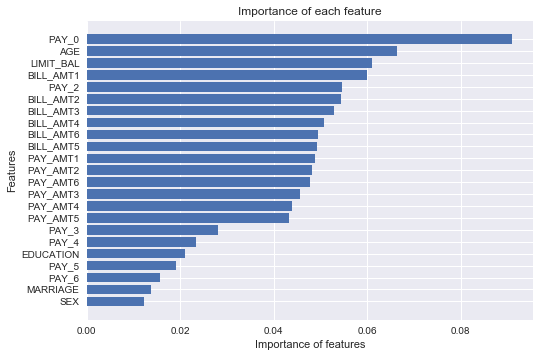

In [12]:
#a = df.ix[:, (df.columns != 'default payment next month') & (df.columns != 'target')]
#print(a.columns)
clf = RandomForestClassifier(n_estimators =25)
clf.fit(X,y)

imp = clf.feature_importances_
names = df.columns

imp,names = zip(*sorted(zip(imp,names)))

plt.barh(range(len(names)),imp,align = 'center')
plt.yticks(range(len(names)),names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [13]:

def plot_decision_surface(clf,X,y):
    plot_step = 0.1
    
    if X.shape[1] !=2:
        raise ValueError("X_train should have exactly 2 columns!")
    
    print('plot1')
    x_min, x_max = X[:,0].min() - plot_step,X[:,0].max() + plot_step
    y_min, y_max = X[:,1].min() - plot_step,X[:,1].max() + plot_step
    xx,yy = np.meshgrid(np.arange(x_min,x_max,plot_step),
                        np.arange(y_min,y_max,plot_step))
    
    clf.fit(X,y)
    if hasattr(clf,'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
        
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx ,yy ,Z ,cmap = plt.cm.Reds)
    plt.scatter(X[:,0],X[:,1],c = y, cmap = plt.cm.Paired)
    plt.show()
    

In [14]:

imp_fe = np.argsort(imp)[::-1][0:2]
X_imp = X[:,imp_fe]

algorithims = [DecisionTreeClassifier(), RandomForestClassifier() , sklearn.svm.SVC(C=100.0, gamma =1)]

title = ['Decision Tree Classifier' ,'Random Forest Classifier' , 'Support Vector Machine']

for i in range(3):
    plt.title(title[i])
    plt.xlabel('Feature1')
    plt.ylabel('Feature 2')
    plot_decision_surface(algorithims[i],X_imp,y)


plot1


MemoryError: 